In [10]:
! pip install pdf2image
! sudo apt-get install poppler-utils  # Ubuntuの場合
! pip install pymupdf matplotlib

/bin/bash: line 1: sudo: command not found
     |████████████████████████████████| 19.6 MB 86.5 MB/s eta 0:00:01


In [16]:
! apt update
! apt install poppler-utils

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1659 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]        
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]      
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1545 kB]3m
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3205 kB]m
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4420 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [55.7 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]     
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1245 kB]
Get:12 http://security.ubuntu.com/ubu

# 全データの有効特異値

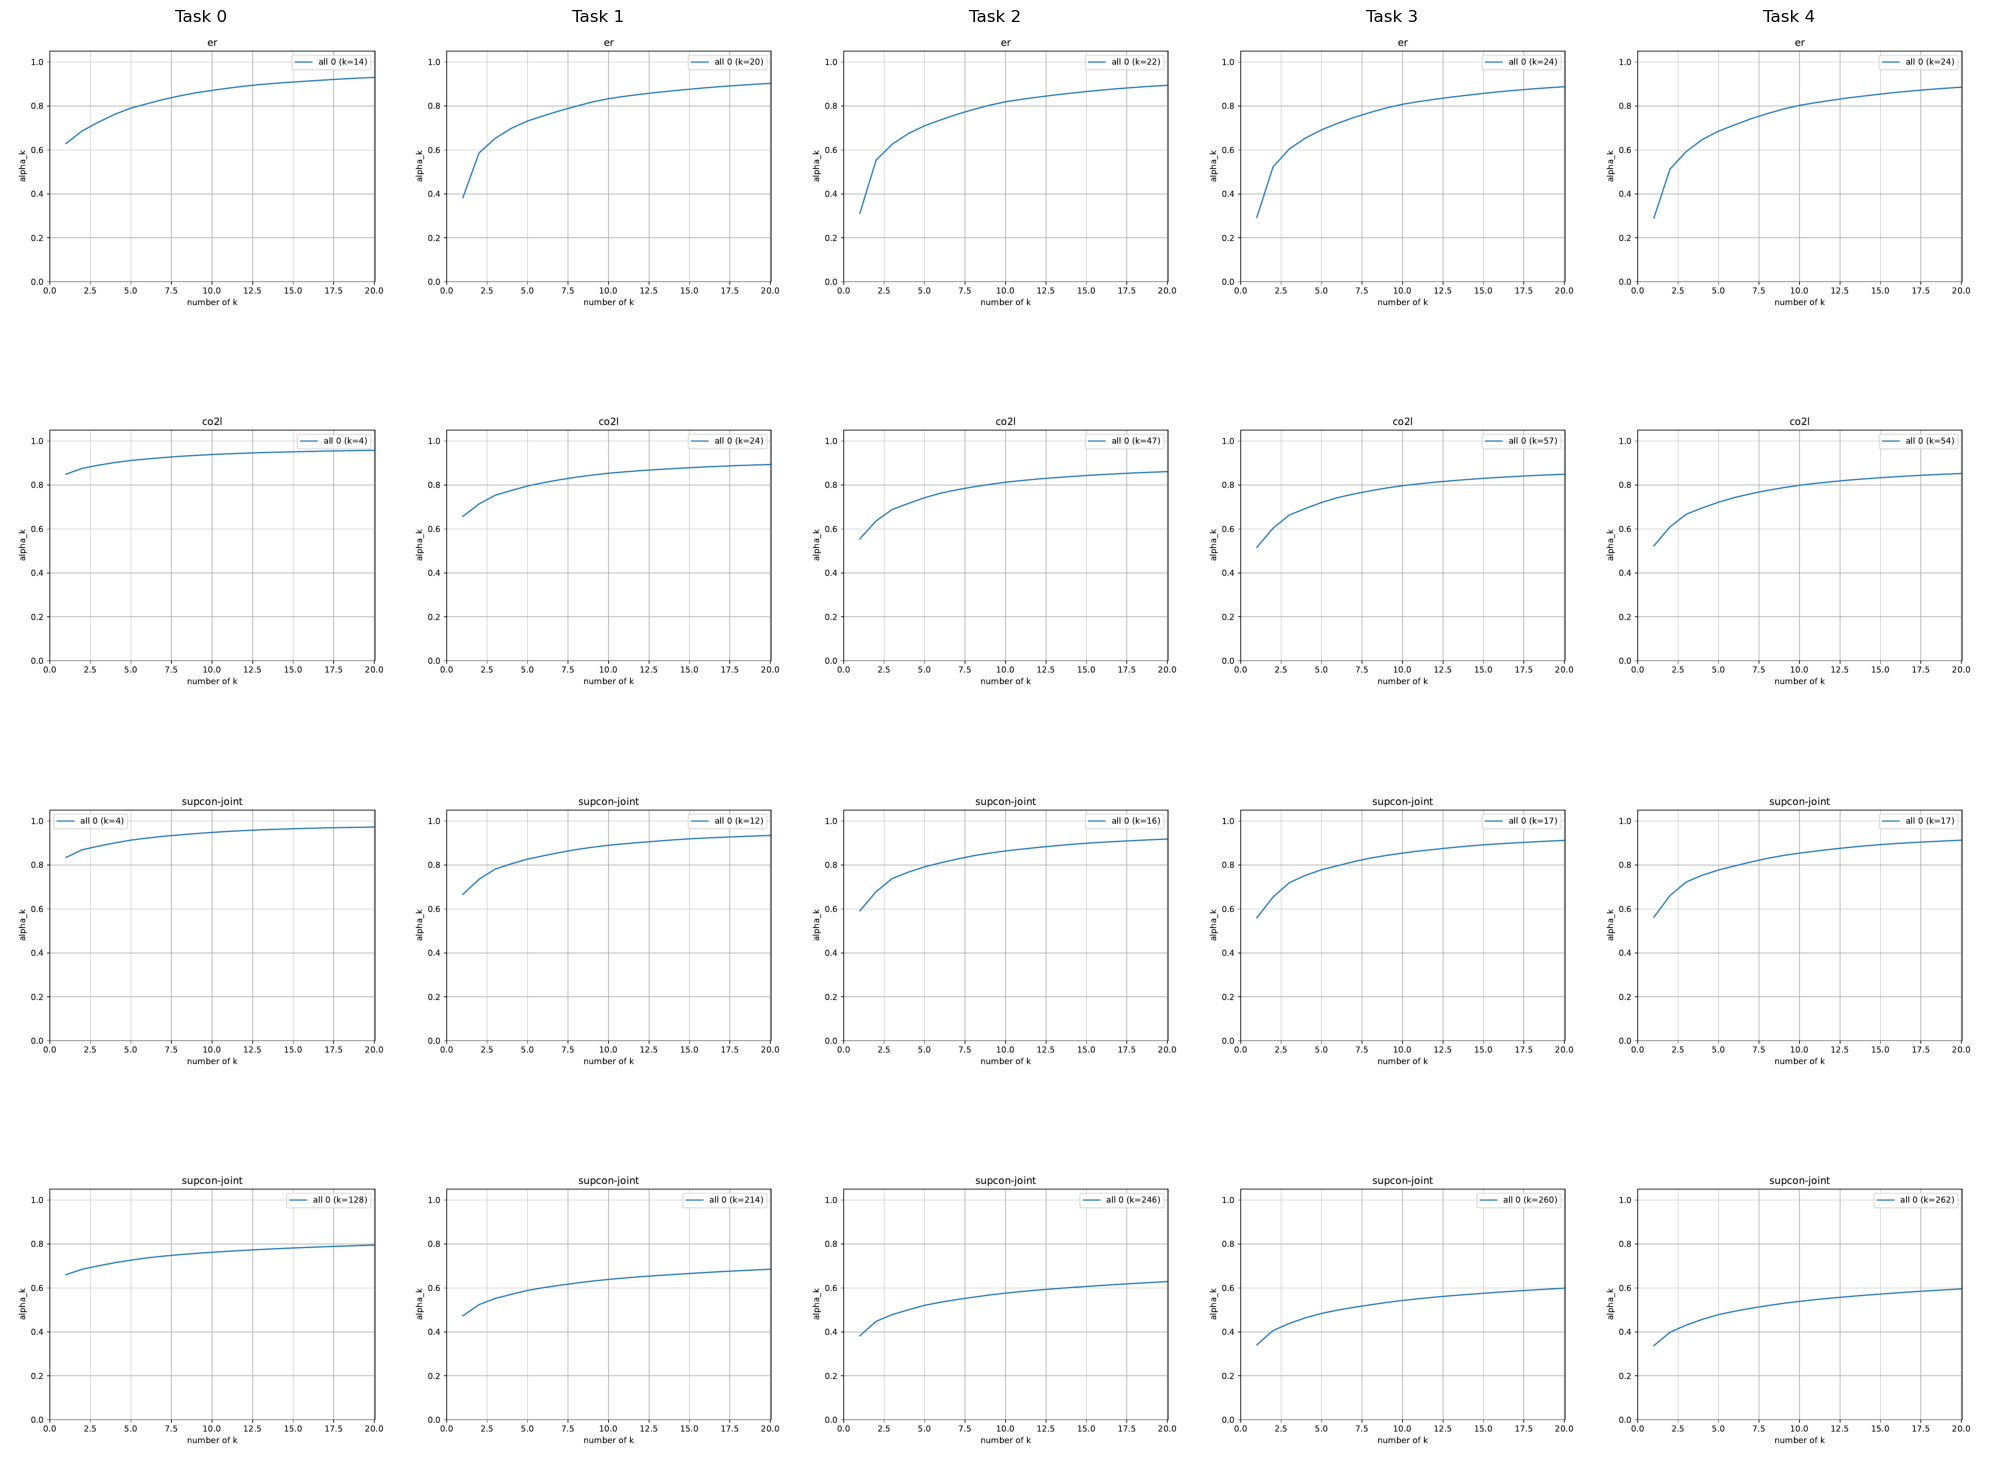

In [4]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.image import imread
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
from PIL import Image

from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import fitz  # PyMuPDF
import matplotlib.pyplot as plt


def show_svd_analysis(method_figure_files):
    methods = list(method_figure_files.keys())
    num_tasks = len(next(iter(method_figure_files.values())))

    fig = plt.figure(figsize=(4 * num_tasks, 4 * len(methods)))
    gs = gridspec.GridSpec(len(methods), num_tasks, figure=fig)

    for i, method in enumerate(methods):
        file_list = method_figure_files[method]
        for j, file_path in enumerate(file_list):
            # try:
            #     # PDFを画像に変換（最初のページだけ）
            #     images = convert_from_path(file_path, dpi=150, first_page=1, last_page=1)
            #     img = images[0]

            #     ax = fig.add_subplot(gs[i, j])
            #     ax.imshow(img)
            #     ax.axis('off')

            #     if i == 0:
            #         ax.set_title(f"Task {j}", fontsize=12)
            #     if j == 0:
            #         ax.set_ylabel(method, fontsize=12)
            # except Exception as e:
            #     print(f"[ERROR] Failed to load {file_path}: {e}")
            
            # PDFを画像に変換（最初のページだけ）
            images = convert_from_path(file_path, dpi=150, first_page=1, last_page=1)
            img = images[0]

            ax = fig.add_subplot(gs[i, j])
            ax.imshow(img)
            ax.axis('off')

            if i == 0:
                ax.set_title(f"Task {j}", fontsize=12)
            if j == 0:
                ax.set_ylabel(method, fontsize=12)

    plt.tight_layout()
    plt.show()





method_figure_files = {
    'ER': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_19/annalyze/svd/alldata/model0_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_19/annalyze/svd/alldata/model1_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_19/annalyze/svd/alldata/model2_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_19/annalyze/svd/alldata/model3_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_19/annalyze/svd/alldata/model4_all_0to0.pdf",
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_04_25/annalyze/svd/alldata/model0_all[0,...,0].pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_04_25/annalyze/svd/alldata/model1_all[0,...,0].pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_04_25/annalyze/svd/alldata/model2_all[0,...,0].pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_04_25/annalyze/svd/alldata/model3_all[0,...,0].pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_04_25/annalyze/svd/alldata/model4_all[0,...,0].pdf",
    ],
    # 'CCLIS': [
    #     "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed0_date2025_04_20/annalyze/svd/alldata/model0_all[0,...,0].pdf",
    #     "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed0_date2025_04_20/annalyze/svd/alldata/model1_all[0,...,0].pdf",
    #     "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed0_date2025_04_20/annalyze/svd/alldata/model2_all[0,...,0].pdf",
    #     "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed0_date2025_04_20/annalyze/svd/alldata/model3_all[0,...,0].pdf",
    #     "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed0_date2025_04_20/annalyze/svd/alldata/model4_all[0,...,0].pdf",
    # ],
    'SupCon-joint(lr=1.0)': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/svd/alldata/model0_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/svd/alldata/model1_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/svd/alldata/model2_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/svd/alldata/model3_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/svd/alldata/model4_all_0to0.pdf",
    ],
    'SupCon-joint(lr=0.02)': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr002_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/svd/alldata/model0_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr002_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/svd/alldata/model1_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr002_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/svd/alldata/model2_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr002_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/svd/alldata/model3_all_0to0.pdf",
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr002_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/svd/alldata/model4_all_0to0.pdf",
    ],
}

show_svd_analysis(method_figure_files)